## Survival Classification

In [1]:
#load data
import os, warnings
warnings.filterwarnings('ignore')
#!pip install kaggle
from zipfile import ZipFile

import numpy as np
import pandas as pd

#eda
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Download Kaggle Titanic Data

In [2]:
!mkdir ~/.kaggle
!echo '{"username":"sherylmichael","key":"ee2137bd8d95cc0d1f29d42dc871a87d"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

os.chdir('/Users/sherilyn/ds_jungle/classification/titanic_survival')
!kaggle competitions download -c titanic
#!ls

mkdir: /Users/sherilyn/.kaggle: File exists
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Read train & test data
zf = ZipFile('titanic.zip')
zf.extractall('data')
zf.close()

In [4]:
train = pd.read_csv(r"data/train.csv")
test = pd.read_csv(r"data/test.csv")

### Exploring Data

#### train

In [5]:
print("train shape:", train.shape)
train.head()

train shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print('train.info():\n')
train.info()

train.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#check for missing data
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

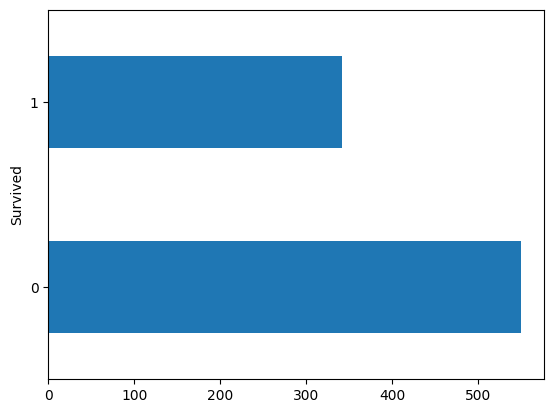

In [9]:
ax = train.Survived.value_counts().plot(kind='barh')

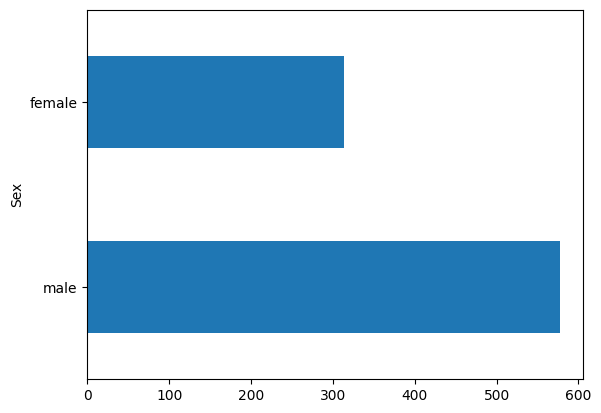

In [10]:
ax = train.Sex.value_counts().plot(kind='barh')

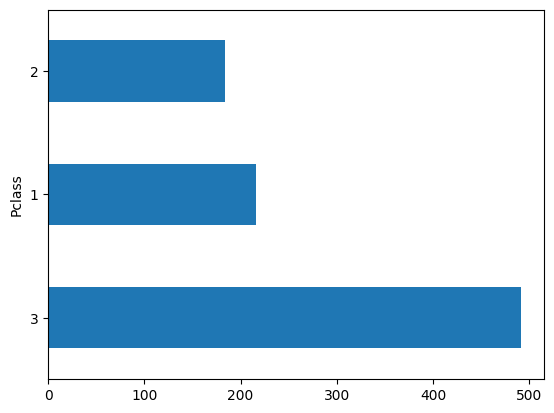

In [11]:
ax = train.Pclass.value_counts().plot(kind='barh')

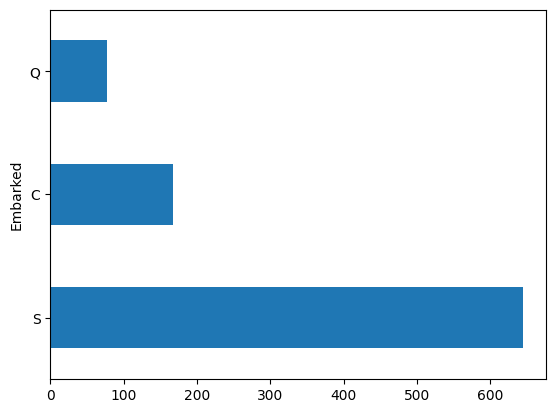

In [12]:
ax = train.Embarked.value_counts().plot(kind='barh')

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

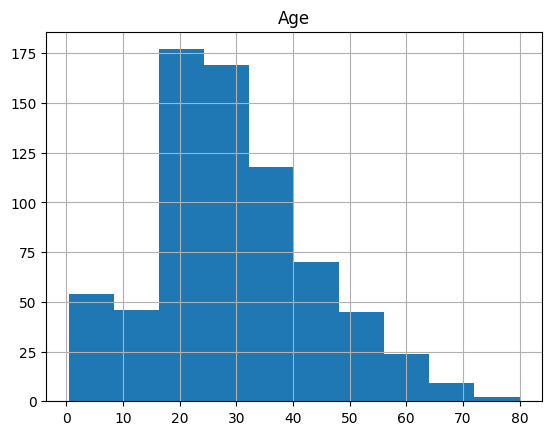

In [13]:
train.hist(column='Age', bins=20)

#### Dataset Summary --> train

The training data has 891 entries described by 11 features (6 numerical and 5 categorical) and 1 outcome variable (Survived).
Three columns have missing data: 
Age is missing 177 entries (19.87%).
Cabin is missing 687 entries (77.1%).
Embarked is missing 2 entries (0.22%).

#### test

In [14]:
print("test shape:", test.shape)
test.head()

test shape: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
print('test.info():\n')
test.info()

test.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
#check for missing data
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Dataset Summary --> test

The training data has 418 entries described by 11 features (6 numerical and 5 categorical).
Three columns have missing data: 
Age is missing 86 entries (20.5%).
Cabin is missing 327 entries (78.2%).

### Clean Data: train, test

In [17]:
print('train:')
#drop 'Cabin' & impute Age, Embarked
train.drop('Cabin',  axis=1, inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
print(train.isna().sum())

train:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Cleaning Data Overview: train

Because Cabin is missing >75% of its values, it was dropped from train.

Missing values in Age were imputed with the average age of all passengers. 

Missing values for 'Embarked' were imputed with the mode.

Classifiers will be trained on the data set, train with 891 entries, 10 features (6 numerical & 4 categorical) and 1 outcome variable (Survived).

In [18]:
print('test:')
#drop 'Cabin' & impute Age, Embarked
test.drop('Cabin',  axis=1, inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace = True)
print(test.isna().sum())

test:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


#### Cleaning Data Overview: test

Because the feature, Cabin, was dropped in the training dataset, it was also dropped in test.

Missing values for the feature, Age, were imputed using the mode (as was done in train).

The testing dataset has 418 entries with 10 features (6 numerical & 4 categorical).

### Feature Engineering

Create features: FarePerPerson, Title, AgeGroup

Drop features: Name, Ticket, Fare, Age

One Hot Encode: Sex, Embarked, Title, AgeGroup

In [19]:
#Create features: FarePerPerson, Title, AgeGroup
data = [train, test]
for dataset in data:
  # Create a fare per person feature
  dataset['FarePerPerson'] = (dataset['Fare'] / (dataset['SibSp'] + dataset['Parch'] + 1)).astype(float)
  # Extract Title from the Name column
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
  # Consolidate other titles into a single 'Other' category
  other_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
  dataset['Title'] = dataset['Title'].replace(other_titles, 'Other')
  # Extract An AgeGroup from the Age column
  dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 12, 18, 60, np.inf], labels=['Child', 'Teenager', 'Adult', 'Senior'])


In [20]:
#Drop features: Name, Ticket, Fare, Age, SibSp, Parch
columns_to_drop = ['Name', 'Ticket', 'Fare', 'Age']

for dataset in data:
    dataset.drop(columns=columns_to_drop, inplace=True)

In [21]:
print(train.sample(5))
print(test.sample(5))

     PassengerId  Survived  Pclass   Sex  SibSp  Parch Embarked  \
145          146         0       2  male      1      1        S   
155          156         0       1  male      0      1        C   
298          299         1       1  male      0      0        S   
768          769         0       3  male      1      0        Q   
442          443         0       3  male      1      0        S   

     FarePerPerson Title AgeGroup  
145        12.2500    Mr    Adult  
155        30.6896    Mr    Adult  
298        30.5000    Mr    Adult  
768        12.0750    Mr    Adult  
442         3.8875    Mr    Adult  
     PassengerId  Pclass     Sex  SibSp  Parch Embarked  FarePerPerson Title  \
130         1022       3    male      0      0        S           8.05    Mr   
155         1047       3    male      0      0        S           7.55    Mr   
278         1170       2    male      1      0        S          10.50    Mr   
362         1254       2  female      0      0        S      

In [22]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Mme', 'Ms', 'Mlle'],
      dtype=object)